In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import os
import pandas as pd


## 0. Read the data

In [2]:
data_folder = "/home/pbranco/Documents/IA_Summer_program/Data/fits"

# Get the name of the subfolders
subfolders = [f.path for f in os.scandir(data_folder) if f.is_dir()]

subfolders

# Get the names of the files in each subfolder
files = {}


### get the name of the stars that are in the last path of each subfolder and put them in a dictionary
for subfolder in subfolders:
    star_name = os.path.basename(subfolder)
    files[star_name] = glob.glob(os.path.join(subfolder, "*.fits"))
# Print the names of the files in each subfolder


stars_names= list(files.keys())
stars_names

['HD_96700',
 'HD_13808',
 'HD_150433',
 'HD_102117',
 'HD_20782',
 'HD_7449',
 'HD_45184',
 'HD_204941',
 'HD_7199',
 'HD_176986',
 'HD_126525',
 'HD_39194',
 'HD_1461',
 'HD_4308',
 'HD_967',
 'HD_181433',
 'HD_145377',
 'HD_38858',
 'HD_93385',
 'HD_63765',
 'HD_215152',
 'HD_31527',
 'HD_134606',
 'HD_20781',
 'HD_85390',
 'HD_82943',
 'HD_134060',
 'HD_154088',
 'HD_564',
 'HD_102365',
 'HD_20003',
 'HD_40307']

In [3]:
##### open a file and read the data
star_name_example = stars_names[0]
star_files = files[star_name_example]

example0 = fits.open(star_files[0])

# Print the header of the first file
example0.info()

Filename: /home/pbranco/Documents/IA_Summer_program/Data/fits/HD_96700/HARPS.2008-02-25T05:43:55.826_ccf_G2_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    3055   (161, 73)   float32   


In [4]:
example0[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  161 / length of data axis 1                          
NAXIS2  =                   73 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HIERARCH ESO DRS CCF RVC = 12.8594002402596 / Baryc RV (drift corrected) (km/s) 
HIERARCH ESO DRS CCF CONTRAST = 40.8455431463715 / Contrast of  CCF (%)         
HIERARCH ESO DRS CCF FWHM = 6.94040489498775 / FWHM of CCF (km/s)               
HIERARCH ESO DRS CCF RV = 12.8596462402596 / Baryc RV (no drift correction) (km/
CRVAL1  =                 -7

In [5]:
data0= example0[0].data
data0

array([[  218334.22,   218611.77,   218968.03, ...,   224136.47,
          223764.16,   223433.4 ],
       [  199663.44,   199551.75,   199571.34, ...,   206300.1 ,
          206481.89,   206835.83],
       [  279291.6 ,   279122.97,   278795.5 , ...,   271748.8 ,
          271401.78,   271441.38],
       ...,
       [  227037.95,   227172.08,   227287.58, ...,   226959.62,
          226956.62,   226916.72],
       [      -0.  ,       -0.  ,       -0.  , ...,        0.  ,
               0.  ,        0.  ],
       [96803224.  , 96776952.  , 96746424.  , ..., 96656512.  ,
        96676208.  , 96695768.  ]], dtype='>f4')

In [6]:
print("Data shape:", data0.shape)

Data shape: (73, 161)


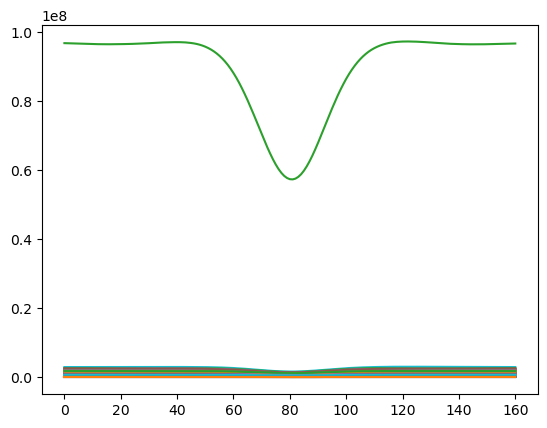

In [7]:
for i in range(data0.shape[0]):
    plt.plot(data0[i,:])

#### 0.1 Colect the information of the FWHM

In [8]:
#### Collect for each header of the files the next information with the following keys:

fwhm= "HIERARCH ESO DRS CCF FWHM"
ccf_noise = "HIERARCH ESO DRS CCF NOISE"
mask = "HIERARCH ESO DRS CCF MASK"


# Create a dictionary to store the data for each star and final convert in a pandas dataframe
### but create a dictionary within the same star name
### and then convert it to a pandas dataframe

data_dict = {
    "star_name": [],
    "fwhm": [],
    "ccf_noise": [],
    "mask": []
}

for star_name in stars_names:
    star_files = files[star_name]
    for file in star_files:
        with fits.open(file) as hdul:
            header = hdul[0].header
            data_dict["star_name"].append(star_name)
            data_dict["fwhm"].append(header.get(fwhm, np.nan))
            data_dict["ccf_noise"].append(header.get(ccf_noise, np.nan))
            data_dict["mask"].append(header.get(mask, np.nan))

#

In [9]:
#convert the dictionary to a pandas dataframe
df = pd.DataFrame(data_dict)
df

,star_name,fwhm,ccf_noise,mask
0,HD_96700,6.940405,0.000257,G2
1,HD_96700,6.939636,0.000488,G2
2,HD_96700,6.941977,0.000406,G2
3,HD_96700,6.940625,0.000226,G2
4,HD_96700,6.932751,0.000879,G2
...,...,...,...,...
955,HD_40307,5.895604,0.000558,K5
956,HD_40307,5.895442,0.000553,K5
957,HD_40307,5.896855,0.000693,K5
958,HD_40307,5.893895,0.000495,K5


In [10]:
#### calculate the error of the ccf

def error_ccf(noise):

    return 2.35 * noise

df["fwhm_error"] = df["ccf_noise"].apply(error_ccf)

df


,star_name,fwhm,ccf_noise,mask,fwhm_error
0,HD_96700,6.940405,0.000257,G2,0.000604
1,HD_96700,6.939636,0.000488,G2,0.001148
2,HD_96700,6.941977,0.000406,G2,0.000953
3,HD_96700,6.940625,0.000226,G2,0.000531
4,HD_96700,6.932751,0.000879,G2,0.002065
...,...,...,...,...,...
955,HD_40307,5.895604,0.000558,K5,0.001311
956,HD_40307,5.895442,0.000553,K5,0.001299
957,HD_40307,5.896855,0.000693,K5,0.001628
958,HD_40307,5.893895,0.000495,K5,0.001162


In [11]:
### create a panda dataframe, with each different star name for a main column and sub colums the fwhm, ccf_noise, mask and ccf_error

df_grouped = df.groupby('star_name').agg({
	'fwhm': list,
	'ccf_noise': list,
	'mask': pd.Series.unique,
	'fwhm_error': list
}).reset_index()

df_grouped

,star_name,fwhm,ccf_noise,mask,fwhm_error
0,HD_102117,"[7.13866595819901, 7.14315804297105, 7.1289032...","[0.000499051723135764, 0.0029386529726965, 0.0...",[G2],"[0.0011727715493690455, 0.006905834485836776, ..."
1,HD_102365,"[6.65715539154258, 6.64777943421837, 6.6497491...","[0.000455082606403963, 0.00139684734301186, 0....",[G2],"[0.001069444125049313, 0.0032825912560778708, ..."
2,HD_126525,"[6.84705595308492, 6.84917318980268, 6.8635841...","[0.000476423339012682, 0.000374189772074275, 0...",[G2],"[0.0011195948466798027, 0.0008793459643745463,..."
3,HD_134060,"[7.56121735899001, 7.56450546799484, 7.5699755...","[0.000533570000578585, 0.000816568177703506, 0...",[G2],"[0.0012538895013596747, 0.0019189352176032393,..."
4,HD_134606,"[7.11802920644991, 7.11911575489841, 7.1205936...","[0.000436269410794499, 0.000610600475483062, 0...",[G2],"[0.0010252331153670726, 0.0014349111173851956,..."
5,HD_13808,"[6.06196008147753, 6.05203450554765, 6.0686212...","[0.00109041448009429, 0.000927249852982402, 0....",[K5],"[0.0025624740282215812, 0.002179037154508645, ..."
6,HD_145377,"[8.24559290955457, 8.23635676798024, 8.2418809...","[0.00289253893023995, 0.00251555623859693, 0.0...",[G2],"[0.006797466486063882, 0.005911557160702786, 0..."
7,HD_1461,"[7.13494184285902, 7.13213704054747, 7.1419708...","[0.000391094931132184, 0.000365345032608217, 0...",[G2],"[0.0009190730881606324, 0.00085856082662931, 0..."
8,HD_150433,"[6.62089420358278, 6.6155084874515, 6.62165123...","[0.000338280648710018, 0.000390135051994839, 0...",[G2],"[0.0007949595244685423, 0.0009168173721878717,..."
9,HD_154088,"[6.3836974245157, 6.36089227927969, 6.38024520...","[0.00262381691592436, 0.000430314355283652, 0....",[K5],"[0.006165969752422246, 0.0010112387349165823, ..."


In [ ]:
#### calculate the weighted median and the error associated to the weighted median
def weighted_median(data, errors):
    """
    Calculate the weighted median of a dataset with associated errors.
    """
    weights = 1 / errors**2
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    
    cumulative_weights = np.cumsum(sorted_weights)
    total_weight = np.sum(sorted_weights)
    
    # Find the weighted median
    half_weight = total_weight / 2.0
    median_index = np.where(cumulative_weights >= half_weight)[0][0]
    
    weighted_median_value = sorted_data[median_index]
    weighted_median_error = np.sqrt(1 / total_weight)
    
    return weighted_median_value, weighted_median_error





In [57]:
aa=np.array([1.0,2.0,3.0,4.0,5.0])
aa_error = np.array([0.15,0.1,0.2,0.3,0.25])

weighted_median(aa, aa_error)

(4.0, 1.0)

In [15]:

df_grouped[df_grouped["star_name"] == "HD_96700"]["fwhm"].values[0]

[6.94040489498775,
 6.93963611908249,
 6.94197650256207,
 6.94062523016888,
 6.93275140001627,
 6.93687417938867,
 6.93981224052563,
 6.93593986781705,
 6.94223642373082,
 6.93812577520537,
 6.93753211883692,
 6.93022120564341,
 6.93758633899675,
 6.93981798999777,
 6.93971754800902,
 6.93969246156537,
 6.93437246775163,
 6.93180328677824,
 6.93542913844849,
 6.93717447462662,
 6.93630589527255,
 6.93529987628808,
 6.9412946892293,
 6.93688531856333,
 6.94043549302234,
 6.93699021841766,
 6.93648573974783,
 6.92992846905022,
 6.9342925869916,
 6.93574186475307]

In [19]:
#### calculate the weighted median and the error associated to the weighted median for a given star
## and allocate for a pandas dataframe

for name in stars_names:
    fwhm_values = df_grouped[df_grouped["star_name"] == name]["fwhm"].values[0]
    fwhm_errors = df_grouped[df_grouped["star_name"] == name]["fwhm_error"].values[0]
    
    weighted_median_value, weighted_median_error = weighted_median(np.array(fwhm_values), np.array(fwhm_errors))
    
    df_grouped.loc[df_grouped["star_name"] == name, "weighted_median_fwhm"] = weighted_median_value
    df_grouped.loc[df_grouped["star_name"] == name, "weighted_median_fwhm_error"] = weighted_median_error

In [20]:
df_grouped

,star_name,fwhm,ccf_noise,mask,fwhm_error,weighted_median_fwhm,weighted_median_fwhm_error
0,HD_102117,"[7.13866595819901, 7.14315804297105, 7.1289032...","[0.000499051723135764, 0.0029386529726965, 0.0...",[G2],"[0.0011727715493690455, 0.006905834485836776, ...",7.136522,0.000247
1,HD_102365,"[6.65715539154258, 6.64777943421837, 6.6497491...","[0.000455082606403963, 0.00139684734301186, 0....",[G2],"[0.001069444125049313, 0.0032825912560778708, ...",6.649558,0.000202
2,HD_126525,"[6.84705595308492, 6.84917318980268, 6.8635841...","[0.000476423339012682, 0.000374189772074275, 0...",[G2],"[0.0011195948466798027, 0.0008793459643745463,...",6.856919,0.000198
3,HD_134060,"[7.56121735899001, 7.56450546799484, 7.5699755...","[0.000533570000578585, 0.000816568177703506, 0...",[G2],"[0.0012538895013596747, 0.0019189352176032393,...",7.561853,0.000236
4,HD_134606,"[7.11802920644991, 7.11911575489841, 7.1205936...","[0.000436269410794499, 0.000610600475483062, 0...",[G2],"[0.0010252331153670726, 0.0014349111173851956,...",7.119863,0.000162
5,HD_13808,"[6.06196008147753, 6.05203450554765, 6.0686212...","[0.00109041448009429, 0.000927249852982402, 0....",[K5],"[0.0025624740282215812, 0.002179037154508645, ...",6.054585,0.000281
6,HD_145377,"[8.24559290955457, 8.23635676798024, 8.2418809...","[0.00289253893023995, 0.00251555623859693, 0.0...",[G2],"[0.006797466486063882, 0.005911557160702786, 0...",8.215951,0.000800
7,HD_1461,"[7.13494184285902, 7.13213704054747, 7.1419708...","[0.000391094931132184, 0.000365345032608217, 0...",[G2],"[0.0009190730881606324, 0.00085856082662931, 0...",7.139740,0.000159
8,HD_150433,"[6.62089420358278, 6.6155084874515, 6.62165123...","[0.000338280648710018, 0.000390135051994839, 0...",[G2],"[0.0007949595244685423, 0.0009168173721878717,...",6.621081,0.000170
9,HD_154088,"[6.3836974245157, 6.36089227927969, 6.38024520...","[0.00262381691592436, 0.000430314355283652, 0....",[K5],"[0.006165969752422246, 0.0010112387349165823, ...",6.368801,0.000172


## 1. Next steps: extract masks, calculate vsini, etc...

In [21]:
different_masks = df["mask"].unique()
print("Different masks found:", different_masks)

Different masks found: ['G2' 'K5']


#### Equations of the masks
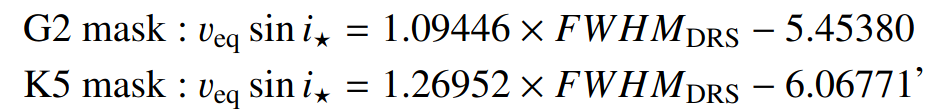


#### Errors equations
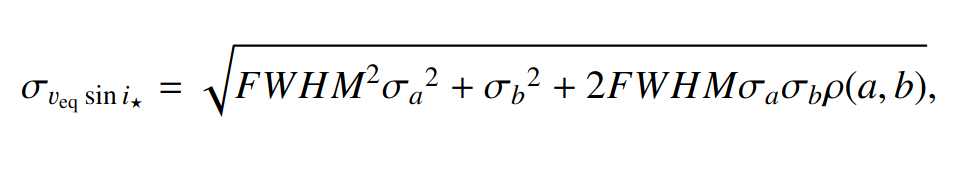


#### Table of the fit parameters

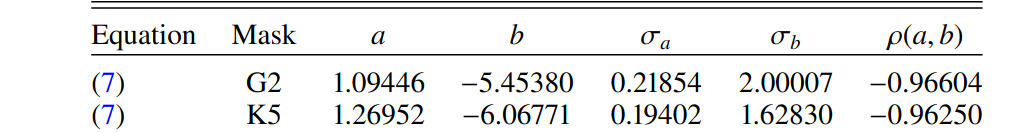

#### Total propagation of the error:

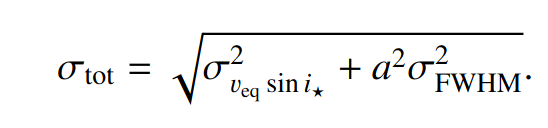

In [37]:
### define the equation of the masks from rainer et al 2023

def mask_equation(mask,fwhm):
    if mask == 'G2':
        return 1.09466* fwhm - 5.45380
    elif mask == "K5":
        return 1.26952 * fwhm - 6.06771
    else:
        return np.nan
    
def error_veq(mask,fwhm):
    if mask == 'G2':
        sigma_a = 0.21854
        sigma_b = 2.00007
        rho_ab = -0.96604
        return np.sqrt(fwhm**2 * sigma_a**2 + sigma_b**2 + 2 * rho_ab * fwhm * sigma_a * sigma_b)
    elif mask == 'K5':
        sigma_a = 0.19402
        sigma_b = 1.62830
        rho_ab = -0.96250
        return np.sqrt(fwhm**2 * sigma_a**2 + sigma_b**2 + 2 * rho_ab * fwhm * sigma_a * sigma_b)
    else:
        return np.nan

### calculate the total error

def total_error(mask,error_veq, ccf_error):

    if mask == 'G2':
        
        a=1.09466

        return np.sqrt(error_veq**2 + (a * ccf_error)**2)
    elif mask == 'K5':
        
        a=1.26952

        return np.sqrt(error_veq**2 + (a * ccf_error)**2)
    else:
        return np.nan
    




# Apply the mask equation to the dataframe
df["v_eq_sin_i"] = df.apply(lambda row: mask_equation(row["mask"], row["fwhm"]), axis=1)

# Apply the error equation to the dataframe
df["error_v_eq_sin_i"] = df.apply(lambda row: error_veq(row["mask"], row["fwhm"]), axis=1)
# Apply the total error equation to the dataframe
df["total_error"] = df.apply(lambda row: total_error(row["mask"], row["error_v_eq_sin_i"], row["fwhm_error"]), axis=1)
# Display the dataframe
df



##### now for the df_grouped but using the weighted median values already calculated
for name in stars_names:
    mask_used = df_grouped.loc[df_grouped["star_name"] == name, "mask"].values[0][0]  # Assuming the first mask is used

    df_grouped.loc[df_grouped["star_name"] == name, "v_eq_sin_i"] = mask_equation(mask_used, df_grouped.loc[df_grouped["star_name"] == name, "weighted_median_fwhm"])
    df_grouped.loc[df_grouped["star_name"] == name, "error_v_eq_sin_i"] = error_veq(mask_used, df_grouped.loc[df_grouped["star_name"] == name, "weighted_median_fwhm"])
    df_grouped.loc[df_grouped["star_name"] == name, "total_error"] = total_error(mask_used, df_grouped.loc[df_grouped["star_name"] == name, "error_v_eq_sin_i"],
                                                                                  df_grouped.loc[df_grouped["star_name"] == name, "weighted_median_fwhm_error"])

In [38]:
df_grouped

,star_name,fwhm,ccf_noise,mask,fwhm_error,weighted_median_fwhm,weighted_median_fwhm_error,v_eq_sin_i,error_v_eq_sin_i,total_error
0,HD_102117,"[7.13866595819901, 7.14315804297105, 7.1289032...","[0.000499051723135764, 0.0029386529726965, 0.0...",[G2],"[0.0011727715493690455, 0.006905834485836776, ...",7.136522,0.000247,2.358265,0.637076,0.637076
1,HD_102365,"[6.65715539154258, 6.64777943421837, 6.6497491...","[0.000455082606403963, 0.00139684734301186, 0....",[G2],"[0.001069444125049313, 0.0032825912560778708, ...",6.649558,0.000202,1.825205,0.704615,0.704615
2,HD_126525,"[6.84705595308492, 6.84917318980268, 6.8635841...","[0.000476423339012682, 0.000374189772074275, 0...",[G2],"[0.0011195948466798027, 0.0008793459643745463,...",6.856919,0.000198,2.052195,0.674630,0.674630
3,HD_134060,"[7.56121735899001, 7.56450546799484, 7.5699755...","[0.000533570000578585, 0.000816568177703506, 0...",[G2],"[0.0012538895013596747, 0.0019189352176032393,...",7.561853,0.000236,2.823858,0.587580,0.587580
4,HD_134606,"[7.11802920644991, 7.11911575489841, 7.1205936...","[0.000436269410794499, 0.000610600475483062, 0...",[G2],"[0.0010252331153670726, 0.0014349111173851956,...",7.119863,0.000162,2.340030,0.639212,0.639212
5,HD_13808,"[6.06196008147753, 6.05203450554765, 6.0686212...","[0.00109041448009429, 0.000927249852982402, 0....",[K5],"[0.0025624740282215812, 0.002179037154508645, ...",6.054585,0.000281,1.618707,0.590933,0.590933
6,HD_145377,"[8.24559290955457, 8.23635676798024, 8.2418809...","[0.00289253893023995, 0.00251555623859693, 0.0...",[G2],"[0.006797466486063882, 0.005911557160702786, 0...",8.215951,0.000800,3.539873,0.534560,0.534561
7,HD_1461,"[7.13494184285902, 7.13213704054747, 7.1419708...","[0.000391094931132184, 0.000365345032608217, 0...",[G2],"[0.0009190730881606324, 0.00085856082662931, 0...",7.139740,0.000159,2.361787,0.636665,0.636665
8,HD_150433,"[6.62089420358278, 6.6155084874515, 6.62165123...","[0.000338280648710018, 0.000390135051994839, 0...",[G2],"[0.0007949595244685423, 0.0009168173721878717,...",6.621081,0.000170,1.794033,0.708860,0.708860
9,HD_154088,"[6.3836974245157, 6.36089227927969, 6.38024520...","[0.00262381691592436, 0.000430314355283652, 0....",[K5],"[0.006165969752422246, 0.0010112387349165823, ...",6.368801,0.000172,2.017610,0.552321,0.552321


## 2. Possible results of the vsini and vsini error for each star

In [41]:
### Create a new dataframe with the star name, v_eq_sin_i, and the total error associated to the v_eq_sin_i of the df_grouped


df_final = df_grouped[["star_name", "v_eq_sin_i", "total_error"]].copy()


##renme the columns
df_final.columns = ["star_name", "v_rot_sini", "v_rot_sini_error"]
df_final

,star_name,v_rot_sini,v_rot_sini_error
0,HD_102117,2.358265,0.637076
1,HD_102365,1.825205,0.704615
2,HD_126525,2.052195,0.674630
3,HD_134060,2.823858,0.587580
4,HD_134606,2.340030,0.639212
5,HD_13808,1.618707,0.590933
6,HD_145377,3.539873,0.534561
7,HD_1461,2.361787,0.636665
8,HD_150433,1.794033,0.708860
9,HD_154088,2.017610,0.552321
